In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Define a function to calculate Gini coefficient
def gini(x):
    y = np.sort(x) # We need to sort them by wealth
    upper_sum = 0
    n = len(x)
    for i in range(n):
        upper_sum += (i+1)*y[i]
    return 1-2/(n-1)*( n - upper_sum/sum(y) )

# Testing the function:    
print('This should be 0:',gini([1,1,1,1]))
print('This should be 1:',gini([1,0,0,0]))
print('This should be something else:',gini([10,5,1,1]))

This should be 0: 0.0
This should be 1: 1.0
This should be something else: 0.6078431372549019


         HISTOGRAM                               HISTORY                              GINI INDEX


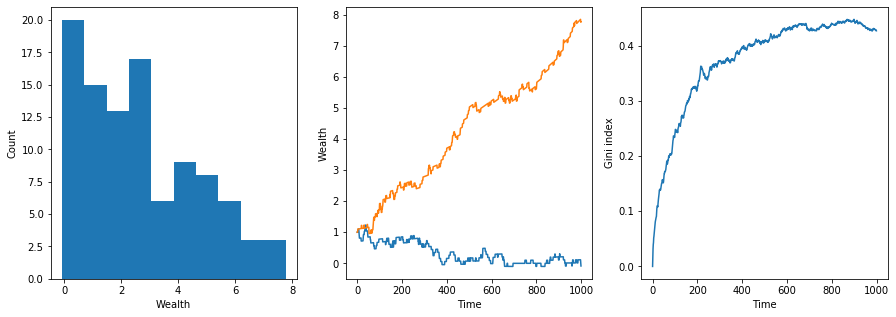

In [32]:
# Remember everything, plot the history.

nsteps = 1000
trades_per_step = 10
npeople = 100
coin = 0.1
interest = 0.001
taxrate = 0     #TAXRATE "KNOB" 
taxcollected = 0 
taxrange = [0.01, 0.1,0.2,0.3]

wealth = np.ones(shape=(nsteps,npeople))
gini_history = np.zeros(nsteps)

#for r in taxrange:        # Loop to go through different taxrates 
    #taxrate = r
    
for t in range(1,nsteps):# We now start at t=1, to be able to refer to t-1 (prev step)
    wealth[t,:] = wealth[t-1,:]*(1+interest)          # By default, wealth at t remains the same as it was at t-1
    for i in range(trades_per_step):  # Let's make more than 2 ppl trade at each time point.
            
            p1 = np.random.randint(low=0, high=npeople)   # (It doesn't change the end solution, just makes plots prettier.
            p2 = np.random.randint(low=0, high=npeople)   # It's equivalent to only remembering eath Kth step.)
            if wealth[t,p1]>0:
                wealth[t,p1] -= coin        # Still update in place
                wealth[t,p2] += coin

            wealth[t,:] = wealth[t,:] - (wealth[t,:] * taxrate) #Subtract tax amount from each person 
            taxcollected = taxcollected + (wealth[t,:] * taxrate) # add up how much tax was collected 
            wealth[t,:] = wealth[t,:] + (taxcollected/npeople) #Re-distribute the wealth
            taxcollected = 0     #reset taxcollected to 0 




    gini_history[t] = gini(wealth[t,:]) # Calculate gini index for the current distribution of wealth
    
#print(taxcollected)
# Figures
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(wealth[-1,:],bins=10);
plt.xlabel('Wealth');
plt.ylabel('Count');

plt.subplot(1,3,2);
poor_one = np.argmin(wealth[-1,:])
rich_one = np.argmax(wealth[-1,:])
plt.plot(wealth[:,poor_one]);
plt.plot(wealth[:,rich_one]);
plt.xlabel('Time');
plt.ylabel('Wealth');

plt.subplot(1,3,3)
plt.plot(gini_history);
plt.xlabel('Time');
plt.ylabel('Gini index');
print("         HISTOGRAM                               HISTORY                              GINI INDEX")

         HISTOGRAM                               HISTORY                              GINI INDEX


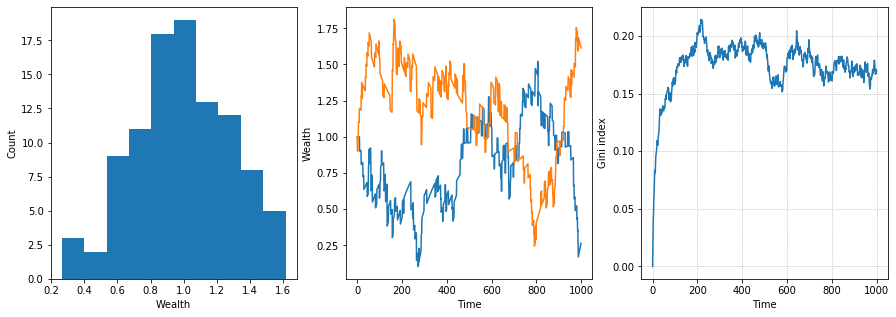

In [62]:
# Remember everything, plot the history.

nsteps = 1000
trades_per_step = 10
npeople = 100
coin = 0.1
interest = 0.000

wealth = np.ones(shape=(nsteps,npeople))
gini_history = np.zeros(nsteps)

taxr = 0.01 
totaltax = 0 

#for r in taxrange:        # Loop to go through different taxrates 
    #taxrate = r
    
for t in range(1,nsteps):# We now start at t=1, to be able to refer to t-1 (prev step)
    wealth[t,:] = wealth[t-1,:]*(1+interest)          # By default, wealth at t remains the same as it was at t-1
    for i in range(trades_per_step):  # Let's make more than 2 ppl trade at each time point.
            
            p1 = np.random.randint(low=0, high=npeople)   # (It doesn't change the end solution, just makes plots prettier.
            p2 = np.random.randint(low=0, high=npeople)   # It's equivalent to only remembering eath Kth step.)
            if wealth[t,p1]>0:
                wealth[t,p1] -= coin        # Still update in place
                wealth[t,p2] += coin
                
    gini_history[t] = gini(wealth[t,:]) # Calculate gini index for the current distribution of wealth
    
    totaltax = np.sum(wealth[t,:])*taxr # Calculate total tax collected 
    
    wealth[t,:] = wealth[t,:] * (1-taxr) #Subtract tax amount from wealth 
    
            
    wealth[t,:] += (totaltax/npeople)
    
            




    
    
#print(taxcollected)
# Figures
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(wealth[-1,:],bins=10);
plt.xlabel('Wealth');
plt.ylabel('Count');

plt.subplot(1,3,2);
poor_one = np.argmin(wealth[-1,:])
rich_one = np.argmax(wealth[-1,:])
plt.plot(wealth[:,poor_one]);
plt.plot(wealth[:,rich_one]);
plt.xlabel('Time');
plt.ylabel('Wealth');

plt.subplot(1,3,3)
plt.plot(gini_history);
plt.xlabel('Time');
plt.ylabel('Gini index');
plt.grid(linestyle = ':')
print("         HISTOGRAM                               HISTORY                              GINI INDEX")